* 목표는 분석 점수

# 준비

## 라이브러리 호출, 옵션

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

from Myfunc import *

plt.rc("font", family="Noto Sans KR", size=13) # 한글 폰트 설정
plt.rc("axes", unicode_minus=False) # 음수값 깨지는 폰트 설정
pd.options.display.max_columns = 50 # 칼럼수 50개까지

## 데이터 불러오기

In [3]:
train = pd.read_csv("data/FIFA_train.csv")
test = pd.read_csv("data/FIFA_test.csv")
submission = pd.read_csv("data/submission.csv")

## 데이터 보기

In [7]:
resumetable(train)

데이터 셋 형상 : (8932, 12)


,피처,데이터 타입,결측값 개수,고윳값 개수,1번째,2번째,3번째,4번째,5번째
0,id,int64,0,8932,"[0, 1]","[3, 1]","[7, 1]","[8, 1]","[9, 1]"
1,name,object,0,8932,"[L. Messi, 1]","[De Gea, 1]","[L. Suárez, 1]","[Sergio Ramos, 1]","[J. Oblak, 1]"
2,age,int64,0,25,"[31, 347]","[27, 581]","[32, 285]","[25, 654]","[26, 708]"
3,continent,object,0,5,"[south america, 1927]","[europe, 5322]","[africa, 721]","[asia, 787]","[oceania, 175]"
4,contract_until,object,0,17,"[2021, 2308]","[2020, 2041]","[2019, 2366]","[2023, 506]","[2022, 761]"
5,position,object,0,4,"[ST, 1705]","[GK, 1008]","[DF, 2791]","[MF, 3428]","[NaN, NaN]"
6,prefer_foot,object,0,2,"[left, 2095]","[right, 6837]","[NaN, NaN]","[NaN, NaN]","[NaN, NaN]"
7,reputation,float64,0,5,"[5.0, 4]","[4.0, 31]","[3.0, 177]","[1.0, 8014]","[2.0, 706]"
8,stat_overall,int64,0,46,"[94, 1]","[91, 3]","[90, 3]","[89, 7]","[88, 10]"
9,stat_potential,int64,0,45,"[94, 1]","[93, 3]","[91, 5]","[90, 14]","[92, 7]"


* id : 선수 고유의 아이디
* name : 이름
* age : 나이
*  continent : 선수들의 국적이 포함되어 있는 대륙입니다
* contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다
* position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등
*  prefer_foot : 선수가 선호하는 발입니다. ex) 오른발
*  reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수
*  stat_overall : 선수의 현재 능력치 입니다.
* stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.
*  stat_skill_moves : 선수의 개인기 능력치 입니다.
* value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다

# 데이터 시각화

## 이적 시장 가격

[Text(0.5, 1.0, '이적료_로그스케일 박스플롯')]

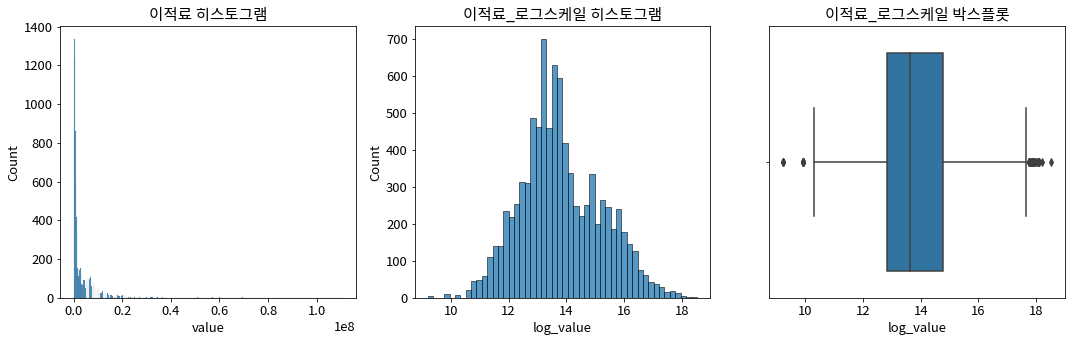

In [129]:
f , axes = plt.subplots(1,3)
axes = axes.flatten()
f.set_size_inches(18,5)

# 이적료에 log
train["log_value"] = np.log(train["value"])

sns.histplot(x="value", data=train, ax=axes[0])
axes[0].set(title = "이적료 히스토그램")
sns.histplot(x="log_value", data=train, ax=axes[1])
axes[1].set(title = "이적료_로그스케일 히스토그램")
sns.boxplot(x="log_value", data=train, ax=axes[2])
axes[2].set(title = "이적료_로그스케일 박스플롯")

* 이적 시장 가격의 편차가 굉장히 큼
* 분석을 진행할때 log scale의 value도 target으로 시도하는 것도 의미있을듯함
* log scale 임에도 불구하고 이상치가 있음. log scale 기준 10~18까지 데이터만 사용

## 나이별 이적료

[Text(0.5, 1.0, '나이별 평균 이적료'), Text(0.5, 0, '나이'), Text(0, 0.5, '이적료')]

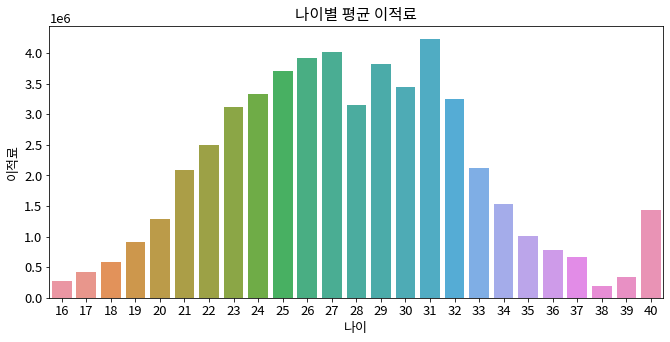

In [36]:
f , ax = plt.subplots()
f.set_size_inches(11,5)

# 나이별 평균 이적료
group_age_value = train.groupby("age")["value"].mean()
group_age_value = group_age_value.reset_index()

# 나이별 평균 이적료 막대 그래프
sns.barplot(x="age", y="value", data=group_age_value)

# 설정
ax.set(title = "나이별 평균 이적료",
      xlabel="나이",
      ylabel="이적료")

[Text(0.5, 1.0, '나이별 평균 이적료_로그스케일'),
 Text(0.5, 0, '나이'),
 Text(0, 0.5, '이적료_로그스케일')]

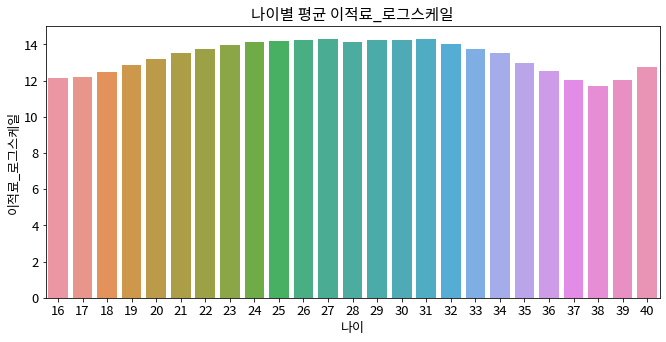

In [39]:
f , ax = plt.subplots()
f.set_size_inches(11,5)

# 나이별 평균 이적료_로그스케일
group_age_logvalue = train.groupby("age")["log_value"].mean()
group_age_logvalue = group_age_logvalue.reset_index()

# 나이별 평균 이적료_로그스케일 막대 그래프
sns.barplot(x="age", y="log_value", data=group_age_logvalue)

# 설정
ax.set(title = "나이별 평균 이적료_로그스케일",
      xlabel="나이",
      ylabel="이적료_로그스케일")

## 현재능력치, 잠재적 능력치

stat_overall의 범위 :  47


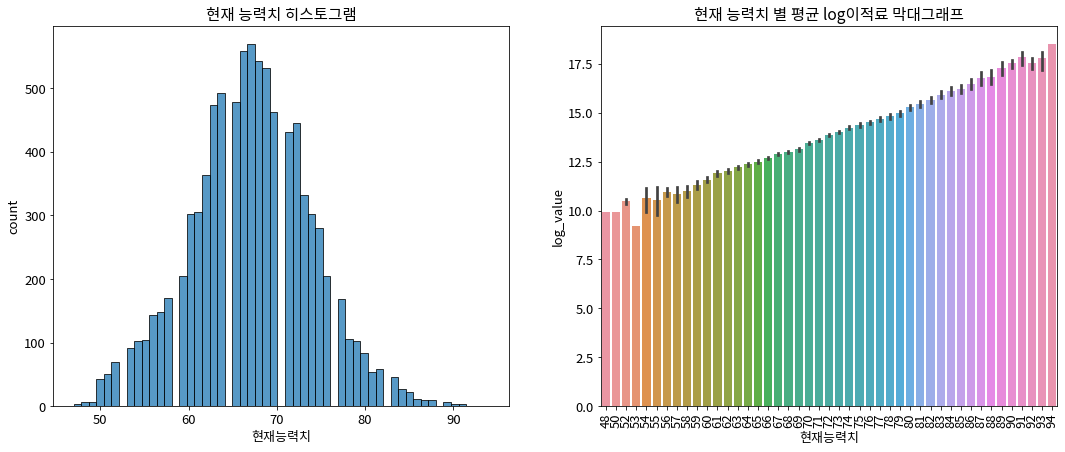

In [138]:
# 현재 능력치 히스토그램,
# 현재 능력치 별 평균 log이적료 막대그래프

f , axes = plt.subplots(1,2)
axes = axes.flatten()
f.set_size_inches(18,7)

print("stat_overall의 범위 : " ,np.ptp(train["stat_overall"])) # 범위

# 히스토그램
sns.histplot(x="stat_overall", data=train, ax=axes[0])
axes[0].set(title = "현재 능력치 히스토그램",
      xlabel="현재능력치",
      ylabel="count")

sns.barplot(x="stat_potential", y="log_value", data=train,ax=axes[1])
axes[1].set(title = "현재 능력치 별 평균 log이적료 막대그래프",
      xlabel="현재능력치",
      ylabel="log_value")
axes[1].tick_params(axis="x", labelrotation=90)

stat_potential의 범위 :  46


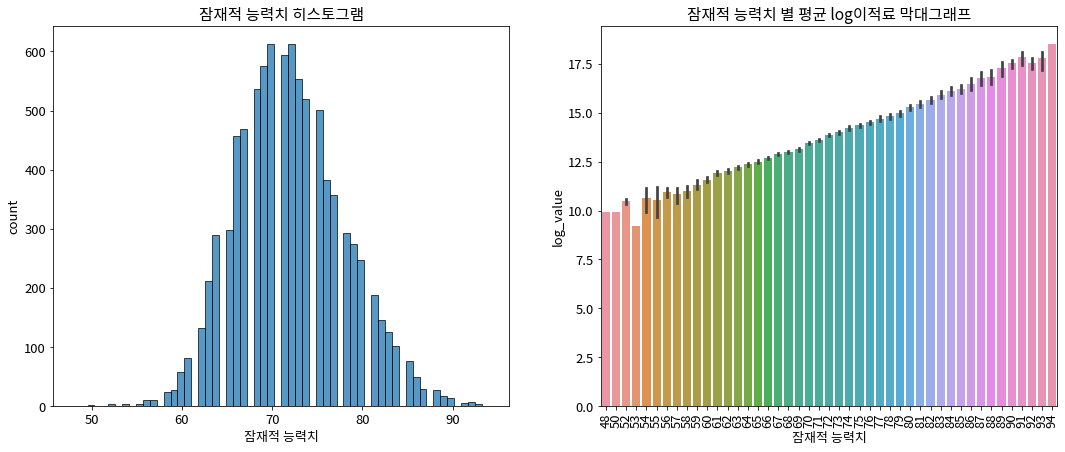

In [107]:
# 잠재적 능력치 히스토그램
# 잠재적 능력치 별 평균 log이적료 막대그래프

f , axes = plt.subplots(1,2)
axes = axes.flatten()
f.set_size_inches(18,7)

print("stat_potential의 범위 : " ,np.ptp(train["stat_potential"])) # 범위

# 히스토그램
sns.histplot(x="stat_potential", data=train, ax=axes[0])
axes[0].set(title = "잠재적 능력치 히스토그램",
      xlabel="잠재적 능력치",
      ylabel="count")

sns.barplot(x="stat_potential", y="log_value", data=train, ax=axes[1])
axes[1].set(title = "잠재적 능력치 별 평균 log이적료 막대그래프",
      xlabel="잠재적 능력치",
      ylabel="log_value")
axes[1].tick_params(axis="x", labelrotation=90)

stat_ap 범위 :  46


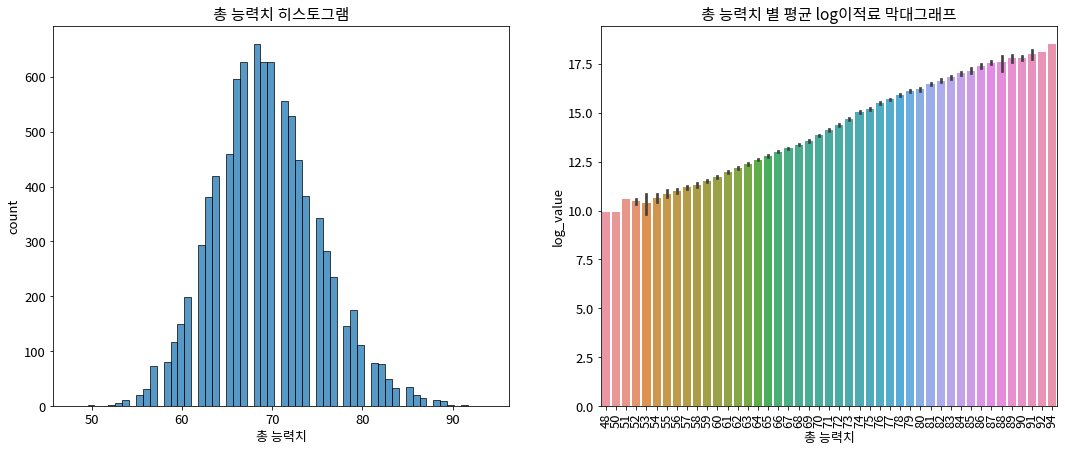

In [108]:
# 총 능력치 = 현재능력치 + 잠재적 능력치 /2
train["stat_ap"] = (train["stat_overall"]+train["stat_potential"])/2
train["stat_ap"] = train["stat_ap"].astype(int)
# 총 능력치 히스토그램
# 총 능력치 별 평균 log이적료 막대그래프

f , axes = plt.subplots(1,2)
axes = axes.flatten()
f.set_size_inches(18,7)

print("stat_ap 범위 : " ,np.ptp(train["stat_ap"])) # 범위

# 히스토그램
sns.histplot(x="stat_ap", data=train, ax=axes[0])
axes[0].set(title = "총 능력치 히스토그램",
      xlabel="총 능력치",
      ylabel="count")

sns.barplot(x="stat_ap", y="log_value", data=train, ax=axes[1])
axes[1].set(title = "총 능력치 별 평균 log이적료 막대그래프",
      xlabel="총 능력치",
      ylabel="log_value")
axes[1].tick_params(axis="x", labelrotation=90)

### 상관관계 확인
* 현재능력치, 잠재적 능력치, 그의 평균능력치와 value 평균와의 상관관계 확인

In [143]:
# 현재 능력치 별 평균 이적료
group_stat_overall_value = train.groupby("stat_overall")["value"].mean()
group_stat_overall_value = group_stat_overall_value.reset_index()

# 잠재적 능력치 별 평균 이적료
group_stat_potential_value = train.groupby("stat_potential")["value"].mean()
group_stat_potential_value = group_stat_potential_value.reset_index()

# 총 능력치 별 평균 이적료
group_stat_ap_value = train.groupby("stat_ap")["value"].mean()
group_stat_ap_value = group_stat_ap_value.reset_index()

group_stat_ap_value.columns = ['stat', 'ap_value']
group_stat_potential_value.columns = ['stat', 'po_value']
group_stat_overall_value.columns = ['stat', 'ov_value']

corrdf = group_stat_ap_value.merge(group_stat_potential_value, how='inner', on='stat').merge(group_stat_overall_value, how='inner', on='stat')
corrdf = corrdf.drop("stat", axis=1)

In [144]:
corrdf.corr().style.background_gradient(cmap="coolwarm")

,ap_value,po_value,ov_value
ap_value,1.000000,0.972179,0.997197
po_value,0.972179,1.000000,0.960423
ov_value,0.997197,0.960423,1.000000


* 모두 아주 강한 상관관계에 있으므로 현재능력치, 잠재적능력치는 제외한다.
* 잠재적 능력치는 스케일링한다.

## 총 능력치와 개인기 능력치 상관관계

[Text(0.5, 1.0, '개인기-이적료 막대그래프')]

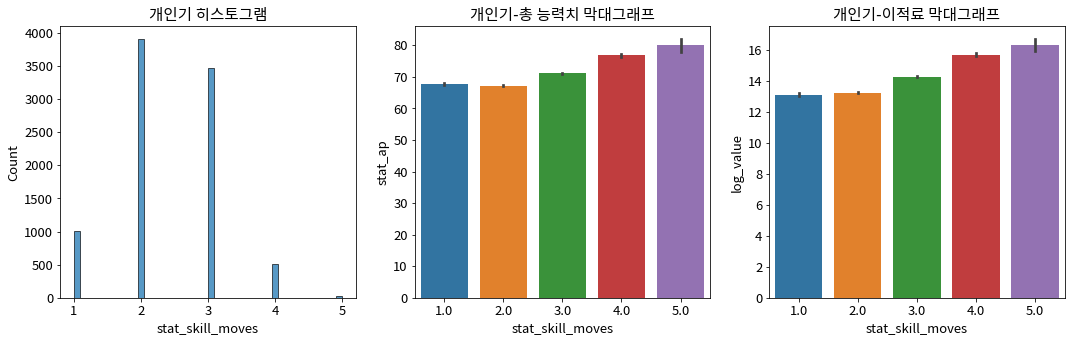

In [127]:
f , axes = plt.subplots(1,3)
axes = axes.flatten()
f.set_size_inches(18,5)

sns.histplot(x="stat_skill_moves", data=train, ax=axes[0])
axes[0].set(title = "개인기 히스토그램")
sns.barplot(x="stat_skill_moves", y="stat_ap", data=train, ax=axes[1])
axes[1].set(title = "개인기-총 능력치 막대그래프")
sns.barplot(x="stat_skill_moves", y="log_value", data=train, ax=axes[2])
axes[2].set(title = "개인기-이적료 막대그래프")

* 개인기 피쳐는 그대로 사용한다.
* OrdinalEncoder() 진행

## 대륙

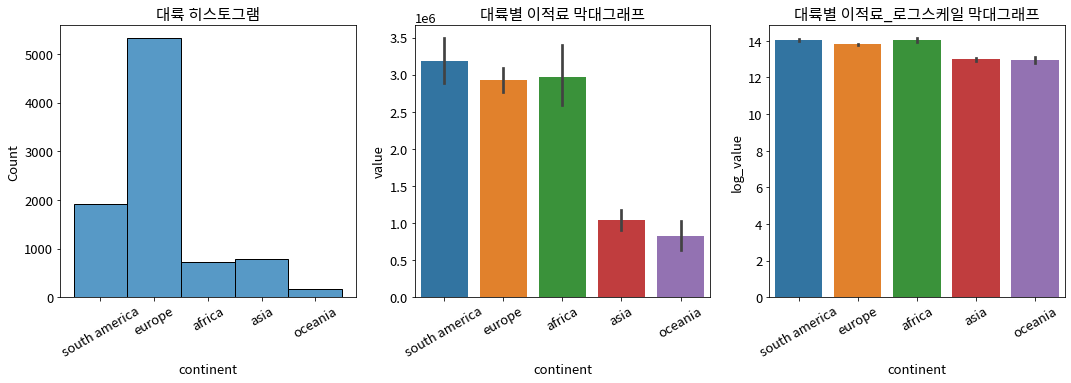

In [184]:
f , axes = plt.subplots(1,3)
axes = axes.flatten()
f.set_size_inches(18,5)


sns.histplot(x="continent", data=train, ax=axes[0])
axes[0].set(title = "대륙 히스토그램")
axes[0].tick_params(axis="x", labelrotation=30)

sns.barplot(x="continent", y="value", data=train, ax=axes[1])
axes[1].set(title = "대륙별 이적료 막대그래프")
axes[1].tick_params(axis="x", labelrotation=30)

sns.barplot(x="continent", y="log_value", data=train, ax=axes[2])
axes[2].set(title = "대륙별 이적료_로그스케일 막대그래프")
axes[2].tick_params(axis="x", labelrotation=30)

* 특이사항 없음
* OneHotEncoder() 진행

## 계약만료기간

* 계약만료기간의 값을 년도별로 정리한다.
* 1월에 계약기간이 끝나는 경우는 전년도로 처리한다.
* 5월은 해당연도에 끝나는 것으로 처리한다.
* 12월은 해당연도에 끝나는 것으로 처리한다.

In [160]:
train.loc[train["contract_until"]=="Jun 30, 2019","contract_until"] = 2018
train.loc[train["contract_until"]=="Dec 31, 2018","contract_until"] = 2018
train.loc[train["contract_until"]=="May 31, 2019","contract_until"] = 2019
train.loc[train["contract_until"]=="Jan 31, 2019","contract_until"] = 2018
train.loc[train["contract_until"]=="Jun 30, 2020","contract_until"] = 2019
train.loc[train["contract_until"]=="Jan 1, 2019","contract_until"] = 2018
train.loc[train["contract_until"]=="May 31, 2020","contract_until"] = 2020
train.loc[train["contract_until"]=="Jan 12, 2019","contract_until"] = 2018

# "2019", 2019를 하나로 묶어주기 위한 타입 변화
train["contract_until"] = train["contract_until"].astype(int)

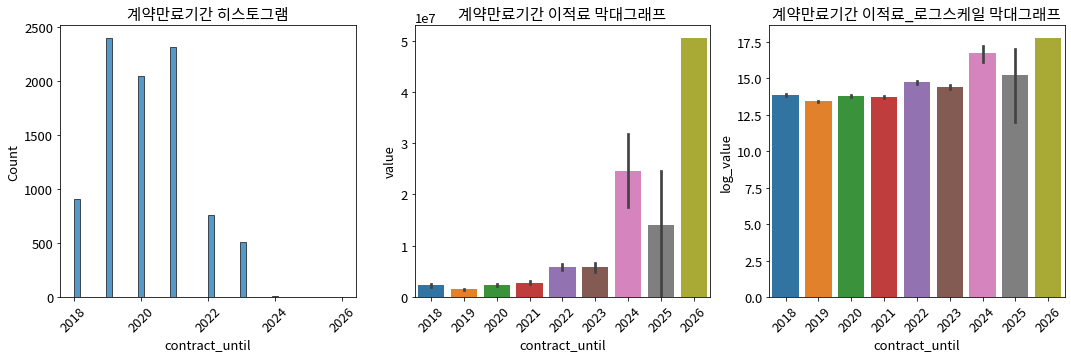

In [185]:
f , axes = plt.subplots(1,3)
axes = axes.flatten()
f.set_size_inches(18,5)


sns.histplot(x="contract_until", data=train, ax=axes[0])
axes[0].set(title = "계약만료기간 히스토그램")
axes[0].tick_params(axis="x", labelrotation=45)

sns.barplot(x="contract_until", y="value", data=train, ax=axes[1])
axes[1].set(title = "계약만료기간 이적료 막대그래프")
axes[1].tick_params(axis="x", labelrotation=45)

sns.barplot(x="contract_until", y="log_value", data=train, ax=axes[2])
axes[2].set(title = "계약만료기간 이적료_로그스케일 막대그래프")
axes[2].tick_params(axis="x", labelrotation=45)

* 계약 만료까지 남은 기간으로 수정,
* 0~8까지의 int로 사용

In [188]:
train["contract_until"] = train["contract_until"].apply(lambda x: x-2018)

## 포지션

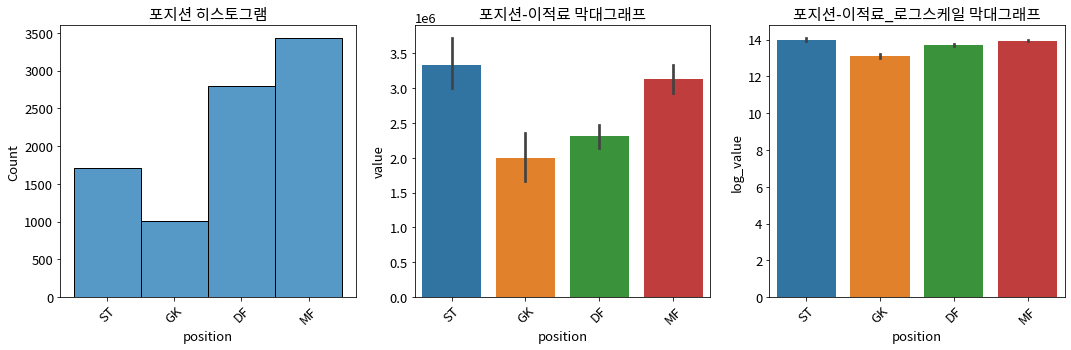

In [191]:
f , axes = plt.subplots(1,3)
axes = axes.flatten()
f.set_size_inches(18,5)


sns.histplot(x="position", data=train, ax=axes[0])
axes[0].set(title = "포지션 히스토그램")
axes[0].tick_params(axis="x", labelrotation=45)

sns.barplot(x="position", y="value", data=train, ax=axes[1])
axes[1].set(title = "포지션-이적료 막대그래프")
axes[1].tick_params(axis="x", labelrotation=45)

sns.barplot(x="position", y="log_value", data=train, ax=axes[2])
axes[2].set(title = "포지션-이적료_로그스케일 막대그래프")
axes[2].tick_params(axis="x", labelrotation=45)

* 특이사항 없는 피쳐,
* OneHotEncoder 진행

## 발

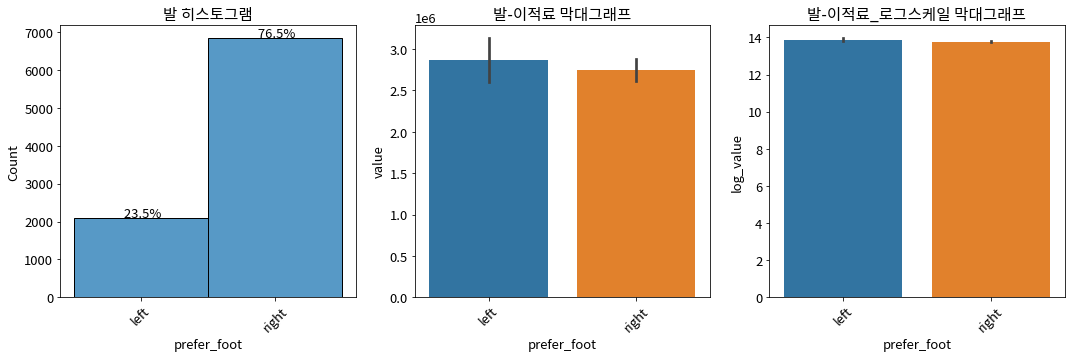

In [203]:
f , axes = plt.subplots(1,3)
axes = axes.flatten()
f.set_size_inches(18,5)


sns.histplot(x="prefer_foot", data=train, ax=axes[0])
axes[0].set(title = "발 히스토그램")
axes[0].tick_params(axis="x", labelrotation=45)
write_percent(axes[0], len(train))

sns.barplot(x="prefer_foot", y="value", data=train, ax=axes[1])
axes[1].set(title = "발-이적료 막대그래프")
axes[1].tick_params(axis="x", labelrotation=45)

sns.barplot(x="prefer_foot", y="log_value", data=train, ax=axes[2])
axes[2].set(title = "발-이적료_로그스케일 막대그래프")
axes[2].tick_params(axis="x", labelrotation=45)

* 어떤 발을 사용하느냐는 중요한 피쳐가 아닐것으로 보인다.
* 특히 left의 신뢰구간을 right가 벗어 나지 못하기 때문에 변별력 없는 변수가 될 것으로 생각된다.

## 인기

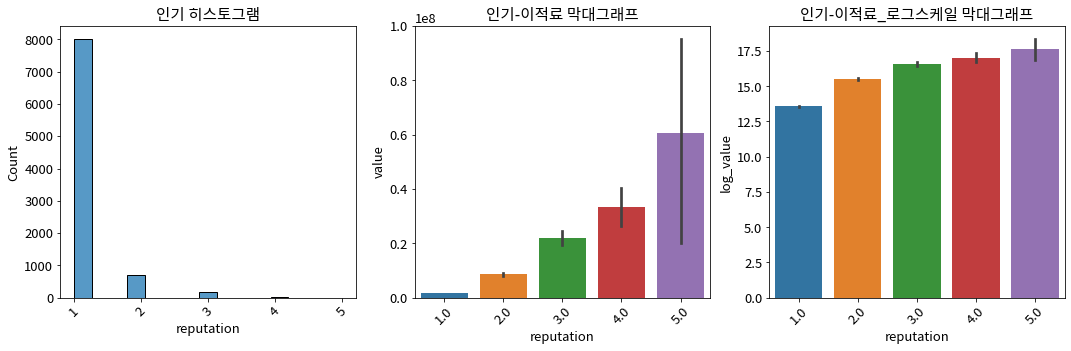

In [201]:
f , axes = plt.subplots(1,3)
axes = axes.flatten()
f.set_size_inches(18,5)


sns.histplot(x="reputation", data=train, ax=axes[0])
axes[0].set(title = "인기 히스토그램")
axes[0].tick_params(axis="x", labelrotation=45)

sns.barplot(x="reputation", y="value", data=train, ax=axes[1])
axes[1].set(title = "인기-이적료 막대그래프")
axes[1].tick_params(axis="x", labelrotation=45)

sns.barplot(x="reputation", y="log_value", data=train, ax=axes[2])
axes[2].set(title = "인기-이적료_로그스케일 막대그래프")
axes[2].tick_params(axis="x", labelrotation=45)

* reputation과 value를 비교할때 reputation 5의 신뢰구간이 너무 넓은것을 확인할 수 있다.
* 이때 reputation : [3,4] 와 5를 구분하기 힘들다
* 하지만 로그스케일의 reputation과은 그 수준이 조금은 줄어들것으로 보이므로
* 피쳐를 제거하지않고 사용한다.